In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from os import path

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv(path.join("..", "data", "adult.csv"), index_col=[0])
df = df.replace("?", np.nan).dropna()

df = df[(df["salary"] == ">50K") | (df["salary"] == "<=50K")]
df["salary K$"] = df["salary K$"].astype(float)
df = df[(df["salary K$"] >= 0.0) & (df["salary K$"] <= 999.0)]
print(df)

       age         workclass   education      marital-status  \
0       39         State-gov   Bachelors       Never-married   
1       50  Self-emp-not-inc   Bachelors  Married-civ-spouse   
2       38           Private     HS-grad            Divorced   
3       53           Private        11th  Married-civ-spouse   
4       28           Private   Bachelors  Married-civ-spouse   
...    ...               ...         ...                 ...   
32556   27           Private  Assoc-acdm  Married-civ-spouse   
32557   40           Private     HS-grad  Married-civ-spouse   
32558   58           Private     HS-grad             Widowed   
32559   22           Private     HS-grad       Never-married   
32560   52      Self-emp-inc     HS-grad  Married-civ-spouse   

              occupation   relationship   race     sex  hours-per-week  \
0           Adm-clerical  Not-in-family  White    Male              40   
1        Exec-managerial        Husband  White    Male              13   
2      Ha

# Task 1
Print the count of men and women in the dataset.

In [3]:
gender_count = df["sex"].value_counts()
print(gender_count)

Male      20380
Female     9782
Name: sex, dtype: int64


# Task 2
Find the average age of men in dataset

In [4]:
men_df = df[df["sex"] == "Male"]
avg_age_men = men_df["age"].mean()
print(avg_age_men)

39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [6]:
poland_count = len(df[df["native-country"] == "Poland"])
total_count = len(df)
poland_percentage = (poland_count / total_count) * 100
print("Percentage of people from Poland:", poland_percentage)

Percentage of people from Poland: 0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [7]:
high_earners = df[df["salary"] == ">50K"]
high_earners_mean_age = high_earners["age"].mean()
high_earners_std_age = high_earners["age"].std()

print("Mean age of high earners:", high_earners_mean_age)
print("Standard deviation of age for high earners:", high_earners_std_age)

low_earners = df[df["salary"] == "<=50K"]
low_earners_mean_age = low_earners["age"].mean()
low_earners_std_age = low_earners["age"].std()

print("Mean age of low earners:", low_earners_mean_age)
print("Standard deviation of age for low earners:", low_earners_std_age)

Mean age of high earners: 43.95911028236548
Standard deviation of age for high earners: 10.269632835673852
Mean age of low earners: 36.60806038668668
Standard deviation of age for low earners: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [18]:
high_earners_no_high_edu = high_earners[~high_earners["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])]
print(len(high_earners_no_high_edu))
if len(high_earners_no_high_edu) > 0:
    print("There are some people without higher education, but with > 50K salary")
else:
    print("There are no people without higher education, but with > 50K salary")

3178
There are some people without higher education, but with > 50K salary


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [9]:
age_stats_by_edu = df.groupby("education")["age"].describe()
print(age_stats_by_edu)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [11]:
married_sal = df.loc[(df["sex"] == "Male") & (df["marital-status"].str.startswith("Married"))]
married_sal_count = len(married_sal)
married_sal_gt_50k = len(married_sal.loc[married_sal["salary"] == ">50K"])

nonmarried_sal = df.loc[(df["sex"] == "Male") & (~df["marital-status"].str.startswith("Married"))]
nonmarried_sal_count = len(nonmarried_sal)
nonmarried_sal_gt_50k = len(nonmarried_sal.loc[nonmarried_sal["salary"] == ">50K"])

print(f"Number of Married Men: {married_sal_count}")
print(f"Number of Married Men with salary > 50K: {married_sal_gt_50k}")
print(f"Number of Non-Married Men: {nonmarried_sal_count}")
print(f"Number of Non-Married Men with salary > 50K: {nonmarried_sal_gt_50k}")

if married_sal_gt_50k/married_sal_count > nonmarried_sal_gt_50k/nonmarried_sal_count:
    print("More married men with >50K salary")
else:
    print("More non-married men with >50K salary")

Number of Married Men: 12775
Number of Married Men with salary > 50K: 5723
Number of Non-Married Men: 7605
Number of Non-Married Men with salary > 50K: 673
More married men with >50K salary


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [11]:
max_hours = df["hours-per-week"].max()

same_hours_count = len(df[df["hours-per-week"] == max_hours])

print("Max hours per week:", max_hours)
print("Number of people who work the same amount of hours per week:", same_hours_count)

Max hours per week: 99
Number of people who work the same amount of hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

<Axes: >

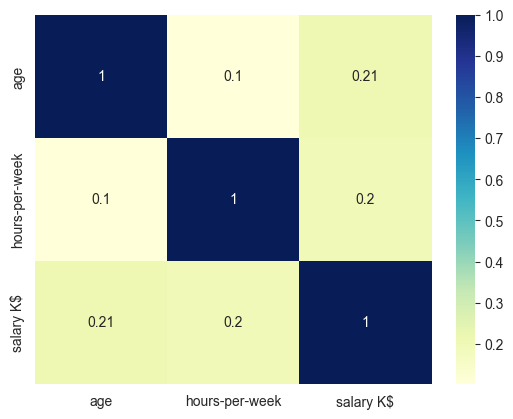

In [5]:
df_subset = df[["age", "hours-per-week", "salary K$"]]
corr_matrix = df_subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")